# <font color='black'>Stock Price Prediction</font>

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('ITC.csv')
df.shape

(497, 15)

In [3]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,18-Jul-2019,272.90,272.95,275.10,272.3,272.95,273.00,273.86,9096757,2.491249e+09,83228,6544144,71.94
1,ITC,EQ,19-Jul-2019,273.00,274.10,274.25,268.0,268.55,268.30,269.75,7986847,2.154470e+09,88555,5138532,64.34
2,ITC,EQ,22-Jul-2019,268.30,268.00,268.20,264.0,264.30,264.40,265.53,13516960,3.589098e+09,168909,10300104,76.20
3,ITC,EQ,23-Jul-2019,264.40,265.50,271.70,265.0,270.95,270.65,268.88,14396986,3.871019e+09,125113,10379638,72.10
4,ITC,EQ,24-Jul-2019,270.65,270.30,273.35,267.9,271.25,270.85,270.08,12072603,3.260569e+09,147314,7610338,63.04


In [4]:
#Statistical Info
df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02,4.970000e+02,497.000000
mean,209.957042,210.394567,212.602012,207.473642,209.830282,209.739940,209.958612,2.590291e+07,5.270325e+09,158702.830986
std,28.323379,28.127904,27.900750,28.389233,27.904503,27.973423,28.117961,1.829195e+07,3.709354e+09,78094.296007
min,147.250000,148.000000,152.000000,134.600000,147.050000,147.250000,143.990000,1.138578e+06,2.914760e+08,1.000000
25%,192.600000,192.500000,195.200000,190.000000,192.600000,192.600000,192.670000,1.439699e+07,3.082824e+09,107061.000000
50%,206.250000,207.000000,208.500000,204.500000,206.400000,206.250000,206.210000,2.080236e+07,4.219315e+09,137418.000000
75%,236.650000,237.400000,238.750000,234.650000,236.400000,236.100000,236.550000,3.099303e+07,6.116701e+09,191598.000000
max,298.900000,274.100000,275.100000,272.300000,272.950000,273.000000,273.860000,1.341850e+08,2.977770e+10,523004.000000


In [5]:
#Datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  497 non-null    object 
 1   Series                  497 non-null    object 
 2   Date                    497 non-null    object 
 3   Prev Close              497 non-null    float64
 4   Open Price              497 non-null    float64
 5   High Price              497 non-null    float64
 6   Low Price               497 non-null    float64
 7   Last Price              497 non-null    float64
 8   Close Price             497 non-null    float64
 9   Average Price           497 non-null    float64
 10  Total Traded Quantity   497 non-null    int64  
 11  Turnover                497 non-null    float64
 12  No. of Trades           497 non-null    int64  
 13  Deliverable Qty         497 non-null    object 
 14  % Dly Qt to Traded Qty  497 non-null    ob

In [6]:
#Check unique values in dataset
df.apply(lambda x: len(x.unique()))

Symbol                      1
Series                      2
Date                      496
Prev Close                435
Open Price                394
High Price                428
Low Price                 407
Last Price                424
Close Price               433
Average Price             482
Total Traded Quantity     497
Turnover                  497
No. of Trades             497
Deliverable Qty           497
% Dly Qt to Traded Qty    463
dtype: int64

In [7]:
#Check null values in dataset, if any
df.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

## PreProcessing

In [8]:
#Converting date column fro object type to datetime type and making it index
df['Date'] = df['Date'].apply(pd.to_datetime)
df.index = df['Date']

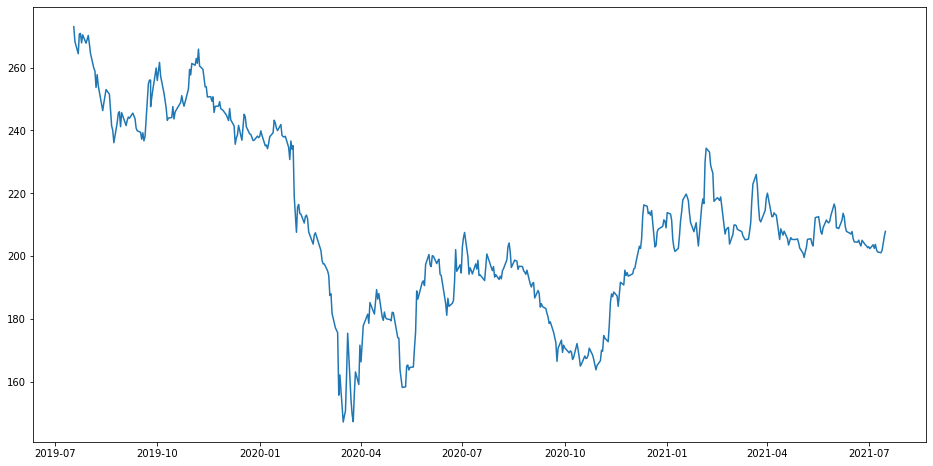

In [9]:
#Plotting the line chart
plt.figure(figsize=(16,8))
plt.plot(df['Close Price'], label='Close Price history')

In [10]:
#Dropping irrelevant Columns
df = df.drop(['Symbol','Series','Prev Close','Deliverable Qty','% Dly Qt to Traded Qty'], axis = 1)
df.head()

,Date,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
Date,,,,,,,,,,
2019-07-18,2019-07-18,272.95,275.10,272.3,272.95,273.00,273.86,9096757,2.491249e+09,83228
2019-07-19,2019-07-19,274.10,274.25,268.0,268.55,268.30,269.75,7986847,2.154470e+09,88555
2019-07-22,2019-07-22,268.00,268.20,264.0,264.30,264.40,265.53,13516960,3.589098e+09,168909
2019-07-23,2019-07-23,265.50,271.70,265.0,270.95,270.65,268.88,14396986,3.871019e+09,125113
2019-07-24,2019-07-24,270.30,273.35,267.9,271.25,270.85,270.08,12072603,3.260569e+09,147314


In [11]:
#Extracting Day, Month, Year from Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(['Date'], axis = 1)
df['Year'] = df['Year'] - 2019
df.head()

,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Day,Month,Year
Date,,,,,,,,,,,,
2019-07-18,272.95,275.10,272.3,272.95,273.00,273.86,9096757,2.491249e+09,83228,18,7,0
2019-07-19,274.10,274.25,268.0,268.55,268.30,269.75,7986847,2.154470e+09,88555,19,7,0
2019-07-22,268.00,268.20,264.0,264.30,264.40,265.53,13516960,3.589098e+09,168909,22,7,0
2019-07-23,265.50,271.70,265.0,270.95,270.65,268.88,14396986,3.871019e+09,125113,23,7,0
2019-07-24,270.30,273.35,267.9,271.25,270.85,270.08,12072603,3.260569e+09,147314,24,7,0


In [12]:
#Creating new target columns and assigning next day value to them.
df['Next Open'] = df['Open Price']
df['Next Close'] = df['Close Price']
df['Next High'] = df['High Price']
df['Next Low'] = df['Low Price']
for i in range(df.shape[0]-1):
    df['Next Open'][i] = df['Open Price'][i+1]
    df['Next Close'][i] = df['Close Price'][i+1]
    df['Next High'][i] = df['High Price'][i+1]
    df['Next Low'][i] = df['Low Price'][i+1]

In [13]:
df=df[:495]
df.tail()

,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Day,Month,Year,Next Open,Next Close,Next High,Next Low
Date,,,,,,,,,,,,,,,,
2021-07-08,203.50,204.50,201.80,202.05,202.00,202.54,20925008,4.238191e+09,141373,8,7,2,202.00,201.35,202.35,200.90
2021-07-09,202.00,202.35,200.90,201.45,201.35,201.63,11834045,2.386052e+09,95596,9,7,2,202.00,201.10,202.55,200.95
2021-07-12,202.00,202.55,200.95,201.10,201.10,201.68,13085323,2.639092e+09,95000,12,7,2,202.00,201.85,202.20,201.35
2021-07-13,202.00,202.20,201.35,202.05,201.85,201.75,10830411,2.185064e+09,66272,13,7,2,201.85,204.10,205.15,201.70
2021-07-14,201.85,205.15,201.70,203.95,204.10,203.56,20480406,4.169037e+09,106786,14,7,2,204.40,206.25,208.50,202.90


## Exploratory Data Anlaysis

<AxesSubplot:xlabel='Average Price', ylabel='Density'>

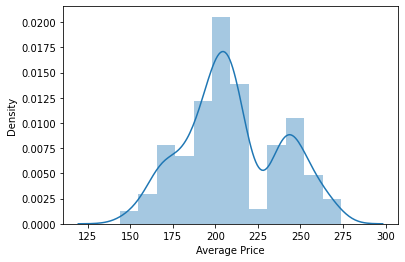

In [14]:
sns.distplot(df['Average Price'])

<AxesSubplot:xlabel='Total Traded Quantity', ylabel='Density'>

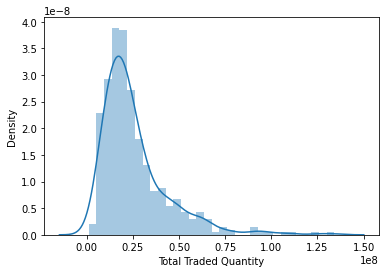

In [15]:
sns.distplot(df['Total Traded Quantity'])

<AxesSubplot:xlabel='Turnover', ylabel='Density'>

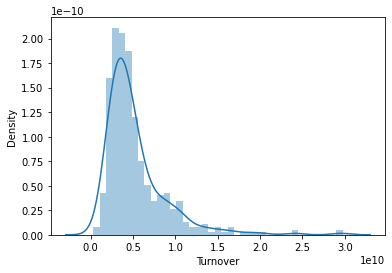

In [16]:
sns.distplot(df['Turnover'])

<AxesSubplot:xlabel='No. of Trades', ylabel='Density'>

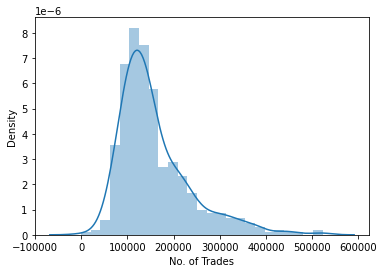

In [17]:
sns.distplot(df['No. of Trades'])

## Split data

In [18]:
train = df[:395]
test = df[395:]

In [19]:
X = df[['Open Price','High Price','Low Price','Last Price','Close Price','Average Price','Total Traded Quantity','Turnover','No. of Trades','Day','Month','Year']]
y_open = df['Next Open']
y_close = df['Next Close']
y_high = df['Next High']
y_low = df['Next Low']


X_train = train[['Open Price','High Price','Low Price','Last Price','Close Price','Average Price','Total Traded Quantity','Turnover','No. of Trades','Day','Month','Year']]
y_train_open = train['Next Open']
y_train_close = train['Next Close']
y_train_high = train['Next High']
y_train_low = train['Next Low']

X_test = test[['Open Price','High Price','Low Price','Last Price','Close Price','Average Price','Total Traded Quantity','Turnover','No. of Trades','Day','Month','Year']]
y_test_open = test['Next Open']
y_test_close = test['Next Close']
y_test_high = test['Next High']
y_test_low = test['Next Low']

## Model Training and Evaluation

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model_open = LinearRegression()
model_open.fit(X_train,y_train_open)
model_open.score(X_test, y_test_open)

0.9249229510291468

In [22]:
model_close = LinearRegression()
model_close.fit(X_train,y_train_close)
model_close.score(X_test, y_test_close)

0.7231110160291208

In [23]:
model_high = LinearRegression()
model_high.fit(X_train,y_train_high)
model_high.score(X_test, y_test_high)

0.8689381389248683

In [24]:
model_low = LinearRegression()
model_low.fit(X_train,y_train_low)
model_low.score(X_test, y_test_low)

0.7765376689011433

In [25]:
#Final Model
model_open_final=LinearRegression()
model_close_final=LinearRegression()
model_high_final=LinearRegression()
model_low_final=LinearRegression()
model_open_final.fit(X,y_open)
model_close_final.fit(X,y_close)
model_high_final.fit(X,y_high)
model_low_final.fit(X,y_low)

LinearRegression()

## Model Prediction

In [26]:
data = [[204.4,208.5,202.9,206.4,206.25,205.96,28852257,5942450170,148819,15,7,2]]
print("Open: ",model_open_final.predict(data)[0].round(2),
      "\nClose:",model_close_final.predict(data)[0].round(2),
      "\nHigh: ",model_high_final.predict(data)[0].round(2),
      "\nLow:  ",model_low_final.predict(data)[0].round(2))

Open:  206.83 
Close: 206.33 
High:  208.56 
Low:   204.58
